In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import matplotlib.font_manager as fm

import os
import urllib.request



In [27]:
fonts_dir = "/tmp/scprint_fonts/"
# URL of the Nunito font file
font_url = "https://github.com/googlefonts/NunitoSans/blob/main/fonts/ttf/NunitoSans-Regular.ttf"

# Create a 'fonts' directory if it doesn't exist
os.makedirs(fonts_dir, exist_ok=True)

# Download the font file
font_path = os.path.join(fonts_dir, 'NunitoSans-Regular.ttf')
if not os.path.exists(font_path):
    urllib.request.urlretrieve(font_url, font_path)
    print(f"Downloaded Nunito font to {font_path}")
else:
    print(f"Nunito font already exists at {font_path}")

fm.fontManager.addfont(font_path)  # Adjust the path as needed

# Set Nunito as the default font
plt.rcParams['font.family'] = 'DejaVu Sans'

Downloaded Nunito font to /tmp/scprint_fonts/NunitoSans-Regular.ttf


RuntimeError: In FT2Font: Can not load face (unknown file format; error code 0x2)

In [28]:
plt.rcParams['font.family'] = 'DejaVu Sans'

In [26]:
fm.fontManager.get_font_names()

['Waree',
 'KacstOne',
 'Padauk Book',
 'KacstDigital',
 'Tibetan Machine Uni',
 'Vemana2000',
 'Lohit Gurmukhi',
 'Arundina Serif',
 'Lohit Gujarati',
 'Lohit Odia',
 'Noto Sans CJK JP',
 'Norasi',
 'Nimbus Sans Narrow',
 'FreeSerif',
 'Samyak Devanagari',
 'Chilanka',
 'Lohit Kannada',
 'DejaVu Serif Display',
 'Jamrul',
 'Ubuntu Condensed',
 'Arundina Sans Mono',
 'Nakula',
 'Sahadeva',
 'Lohit Telugu',
 'Standard Symbols PS',
 'Suruma',
 'cmb10',
 'padmaa-Bold.1.1',
 'STIXGeneral',
 'Purisa',
 'LKLUG',
 'Kinnari',
 'KacstBook',
 'Dyuthi',
 'cmex10',
 'Umpush',
 'Khmer OS System',
 'Sarai',
 'C059',
 'Pagul',
 'Lohit Assamese',
 'Manjari',
 'Chandas',
 'Rasa',
 'cmmi10',
 'cmr10',
 'Lohit Tamil',
 'ori1Uni',
 'Arundina Sans',
 'KacstScreen',
 'Abyssinica SIL',
 'STIXSizeOneSym',
 'Tlwg Mono',
 'cmsy10',
 'Samyak Malayalam',
 'mry_KacstQurn',
 'Samyak Tamil',
 'KacstPoster',
 'FreeMono',
 'Mitra Mono',
 'Yrsa',
 'Tlwg Typo',
 'DejaVu Sans Display',
 'D050000L',
 'Nimbus Sans',
 'Phet

In [29]:
res = pd.read_csv('data/omni.tsv', sep="\t")
res

,model,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only,celltype
0,GENIE3,kidney distal convoluted tubule epithelial cell,5.850000,0.002520,0.001060,14.700000,True,True,False
1,GENIE3,kidney distal convoluted tubule epithelial cell,1.750000,0.001080,0.001060,2.900000,False,False,True
2,GENIE3,kidney loop of Henle thick ascending limb epit...,4.900000,0.003310,0.001210,10.000000,True,True,True
3,GENIE3,kidney loop of Henle thick ascending limb epit...,0.720000,0.001200,0.001210,2.500000,False,False,True
4,GENIE3,kidney collecting duct principal cell,8.780000,0.004760,0.001360,1.400000,True,True,True
...,...,...,...,...,...,...,...,...,...
340,DeepSEM,pericyte,5.920278,0.003289,0.000973,0.000000,False,True,False
341,DeepSEM,lymphocyte,0.913508,0.001039,0.001057,25.806452,False,False,False
342,DeepSEM,lymphocyte,5.347907,0.003404,0.001057,9.677419,False,True,False
343,DeepSEM,stromal cell,0.986819,0.001096,0.001162,16.129032,False,False,True


In [30]:
#res = res[res.name != "endothelial cell"].iloc[:79] # first dataset
#res = res.iloc[86:149] # second dataset
#res = res.iloc[149:]
res.iloc[298, 2] = 19.

In [31]:
res['TF_only'] = res['TF_only'].replace({True: 'TF-gene only', False: "All"})
#res['model'] = res['model'].replace({"scPRINT-class": "scPRINT-omni"})
res = res.rename(columns={'TF_only': 'Format'})
res = res.sort_values(by="model")

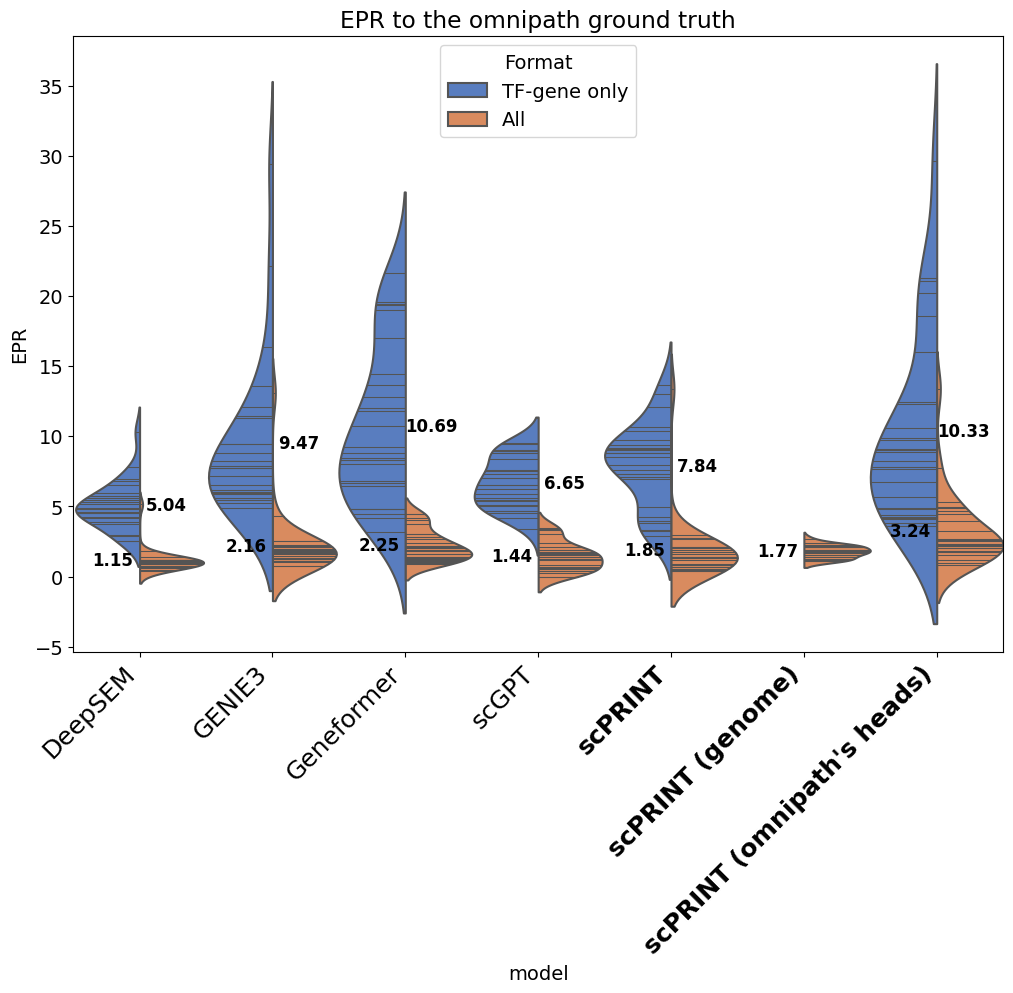

In [41]:
# Set the aesthetic style of the plots

# Create the violin plot with adjusted scale to fix the tiny side issue
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='model', y='EPR', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Add the mean value as text
mean_values = res.groupby(['model', 'Format'])['EPR'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(xloc + offset, mean_values['EPR'][i], f"{mean_values['EPR'][i]:.2f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')
# Set the title and labels of the plot
violin_plot.set_title('EPR to the omnipath ground truth')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('EPR')

# Rotate the x labels for better readability and align them
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)


# Show the plot
plt.show()


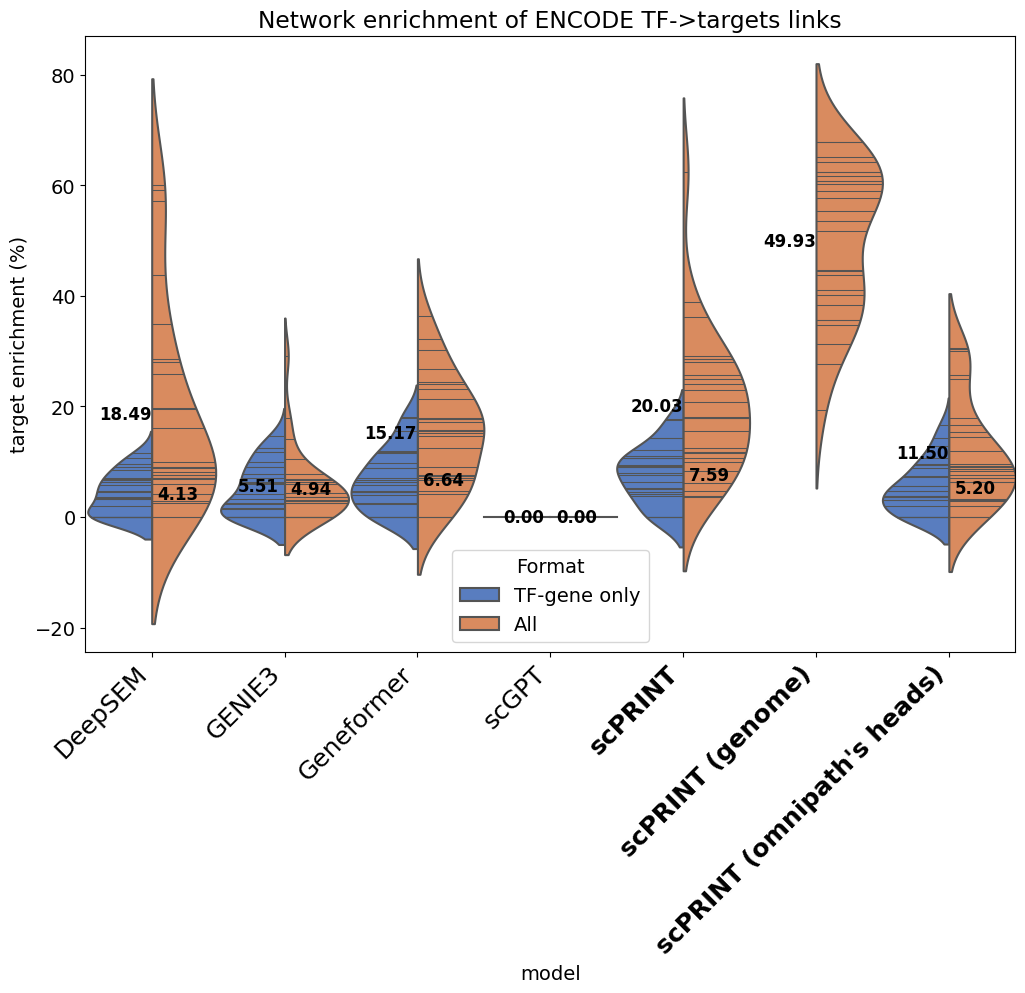

In [14]:
# Create the violin plot
plt.figure(figsize=(12, 8))

violin_plot = sns.violinplot(x='model', y='TF_targ', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Network enrichment of ENCODE TF->targets links')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('target enrichment (%)')
# Add the mean value as text
mean_values = res.groupby(['model', 'Format'])['TF_targ'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(xloc+offset, mean_values['TF_targ'][i], f"{mean_values['TF_targ'][i]:.2f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')

# Rotate the x labels for better readability
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)
# Show the plot
plt.show()

In [7]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

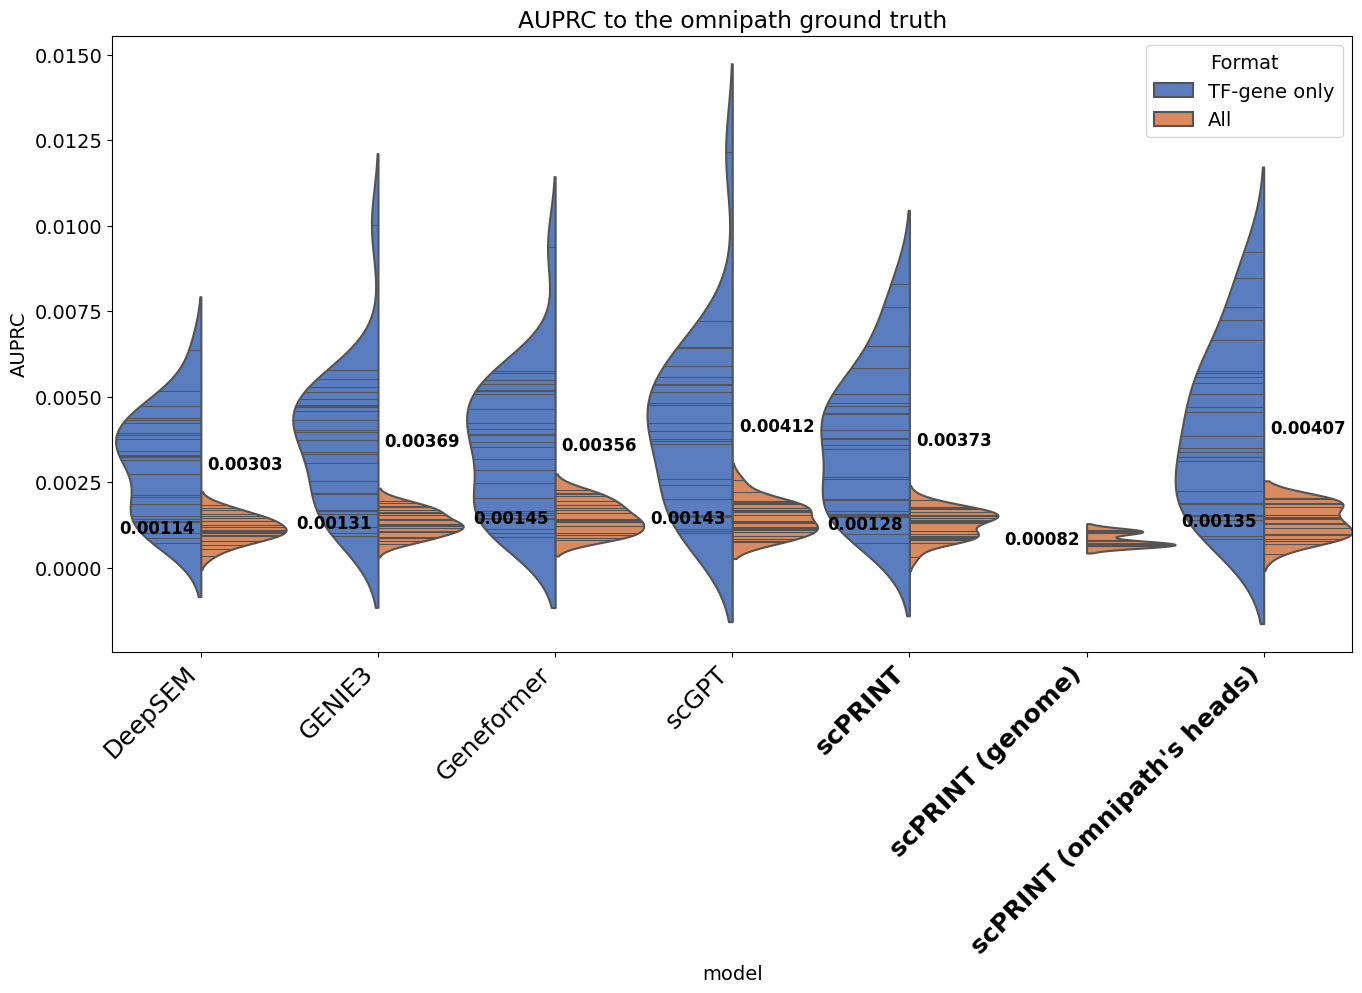

In [8]:
# Create the violin plot
plt.figure(figsize=(16, 8))
violin_plot = sns.violinplot(x='model', y='AUPRC', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('AUPRC to the omnipath ground truth')# of different models across multiple cell type specific predictions')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('AUPRC')

mean_values = res.groupby(['model', 'Format'])['AUPRC'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.25 if mean_values['Format'][i] == 'TF-gene only' else -0.25
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(offset + xloc, mean_values['AUPRC'][i], f"{mean_values['AUPRC'][i]:.5f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')
# Rotate the x labels for better readability and increase their size
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()

scGPT achieves very very high value for endothelial cell where it had negative value in the non TF-only mode. showing that this is likely non specific

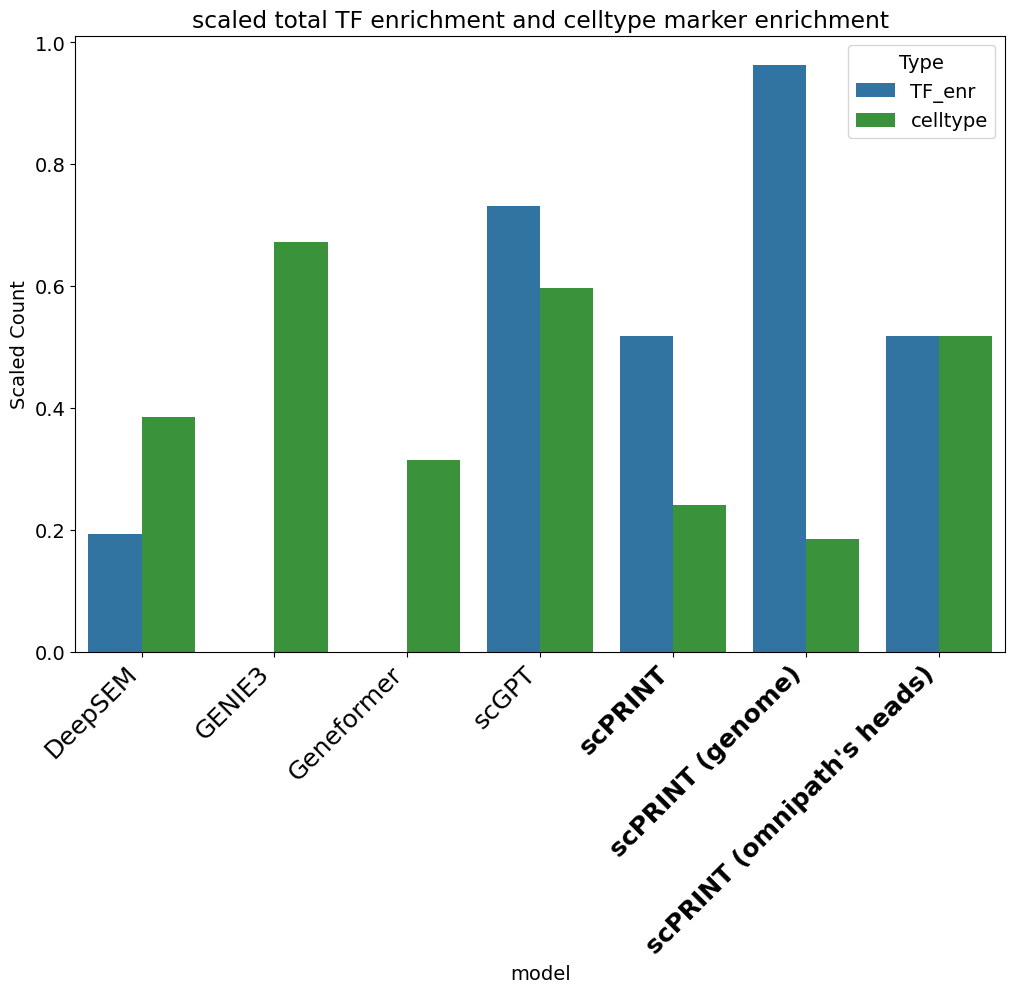

In [9]:
# Count the number of TF_enr and celltype
tf_enr_count = res[(res.Format != 'TF-gene only')].groupby(['model'])['TF_enr'].sum().reset_index()
celltype_count = res.groupby(['model'])['celltype'].sum().reset_index()

# Merge the total count with tf_enr_count and celltype_count
tf_enr_count = tf_enr_count.merge(res[(res.Format != 'TF-gene only')].groupby(['model']).size().reset_index(name='Total'), on='model')
celltype_count = celltype_count.merge(res.groupby(['model']).size().reset_index(name='Total'), on='model')

# Scale the counts by the total number of elements per model
tf_enr_count['Count'] = tf_enr_count['TF_enr'] / tf_enr_count['Total']
celltype_count['Count'] = celltype_count['celltype'] / celltype_count['Total']

# Create a new DataFrame for plotting
tf_enr_count['Type'] = 'TF_enr'
celltype_count['Type'] = 'celltype'
tf_enr_count = tf_enr_count[['model', 'Count', 'Type']]
celltype_count = celltype_count[['model', 'Count', 'Type']]
count_data = pd.concat([tf_enr_count, celltype_count])

# Create the barplot with hue for Type
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='model', y='Count', hue='Type', data=count_data, palette=[sns.color_palette()[0], sns.color_palette()[2]])

# Set the title and labels of the plot
bar_plot.set_title('scaled total TF enrichment and celltype marker enrichment')# counts by model  by total number of elements, excluding TF-gene only format)')
bar_plot.set_xlabel('model')
bar_plot.set_ylabel('Scaled Count')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)
# Show the plot
plt.show()


In [20]:
res = pd.read_csv('data/sroy.tsv', sep="\t", )
res

,tool,name,EPR,AUPRC,RAND,TF_only
0,genie3,Han et. al.,1.440000,0.029200,0.027400,False
1,genie3,Han et. al. (ChIP),1.210000,0.276600,0.253700,False
2,genie3,Han et. al. (KO),1.120000,0.077500,0.076600,False
3,genie3,Yan et. al.,1.090000,0.028600,0.024700,False
4,genie3,Tran et. al.,0.970000,0.073700,0.079600,False
5,genie3,Tran et. al. (ChIP),0.950000,0.197200,0.198900,False
6,genie3,Tran et. al. (KO),0.970000,0.073700,0.079600,False
7,genie3,Zhao et. al.,1.060000,0.057900,0.053100,False
8,scGPT,Han et. al.,0.390000,0.021800,0.027400,False
9,scGPT,Han et. al. (ChIP),1.250000,0.244400,0.253700,False


In [21]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

/tmp/ipykernel_2876653/4278887551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


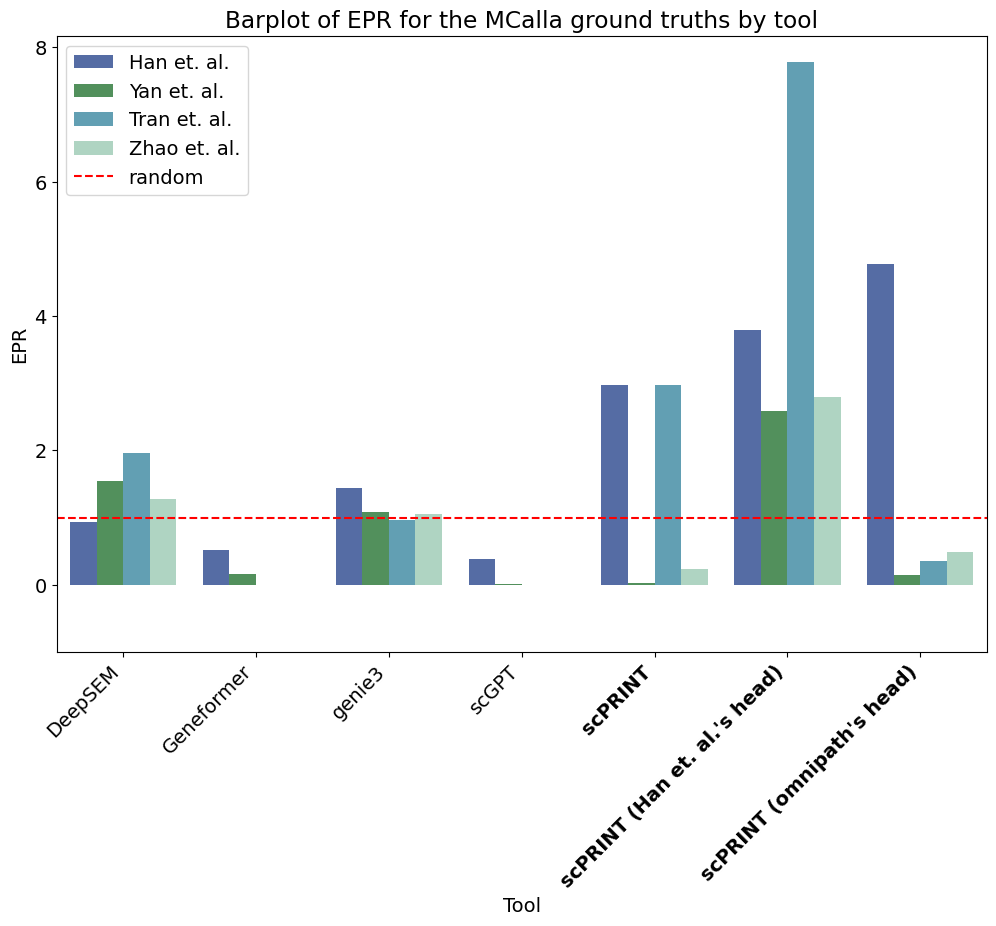

In [22]:
filtered_res = res[~(res['name'].str.contains('ChIP') | res['name'].str.contains('KO'))]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='EPR').reset_index()

plt.figure(figsize=(12, 8))
order = ['Han et. al.', 'Yan et. al.', 'Tran et. al.', 'Zhao et. al.']

bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'), hue_order=order, palette=['#4867B1', '#479B55', '#54A6C1', '#A9DAC2'])

# Add the random line at y=1
plt.axhline(y=1, color='r', linestyle='--', label='random')

# Set the title and labels of the plot
bar_plot.set_title('Barplot of EPR for the MCalla ground truths by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('EPR')
bar_plot.set(ylim=(-1, None))


# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
# Show the plot
plt.legend()
plt.show()


/tmp/ipykernel_2876653/1013756890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


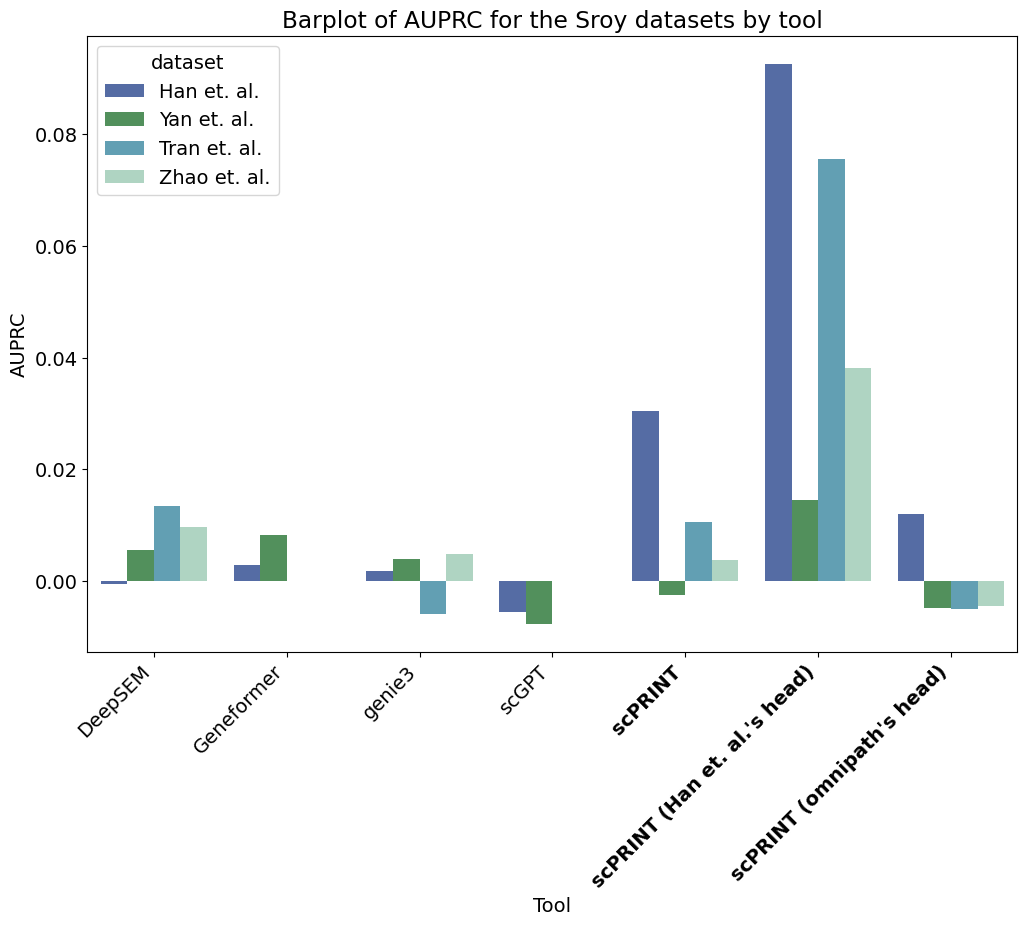

In [23]:
filtered_res = res[~(res['name'].str.contains('ChIP') | res['name'].str.contains('KO'))]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='AUPRC').reset_index()
plt.figure(figsize=(12, 8))
order = ['Han et. al.', 'Yan et. al.', 'Tran et. al.', 'Zhao et. al.']
bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'), hue_order=order, palette=['#4867B1', '#479B55', '#54A6C1', '#A9DAC2'])

# Set the title and labels of the plot
bar_plot.set_title('Barplot of AUPRC for the Sroy datasets by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('AUPRC')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
        
# Show the plot
plt.show()

In [17]:
res = pd.read_csv('data/ablation_scores.tsv', sep="\t")
res

,id,description,denoise/reco2full_vs_noisy2full,emb_lung/ct_class,emb_lung/scib,emb_panc/ct_class,emb_panc/scib,grn_gwps/auprc,grn_gwps/auprc_omni,grn_gwps/auprc_self,...,grn_omni/tf_enr,grn_omni/tf_enr_class,grn_omni/tf_targ_enr,grn_omni/tf_targ_enr_class,grn_sroy/auprc,grn_sroy/auprc_omni,grn_sroy/auprc_self,grn_sroy/epr,grn_sroy/epr_omni,grn_sroy/epr_self
0,24chcp2e,medium-nofreeze,0.152000,0.45245,0.540570,0.521060,0.532150,0.028780,0.030830,0.037600,...,4.0,6.0,39.94006,12.74848,0.101730,0.099720,0.105390,0.91703,0.793900,1.320040
1,25eer0xz,an-interesting-one,0.074830,0.50634,0.527970,0.368090,0.482550,0.029820,0.029090,0.036030,...,8.0,3.0,14.36356,12.83615,0.096430,0.097920,0.099690,0.89802,0.861510,1.027060
2,3pb76o4g,medium-lognorm,0.166820,0.67238,0.556430,0.340920,0.471610,0.035260,0.035780,0.036280,...,0.0,0.0,10.64455,8.58690,0.093020,0.094330,0.105550,0.95413,0.905260,1.430050
3,5qkqjrxy,medium-network-bias,0.161200,0.59747,0.539870,0.576000,0.503580,0.033320,0.033320,0.035310,...,0.0,1.0,16.13036,6.18852,0.102380,0.101320,0.096640,1.16931,0.938260,0.937630
4,3mku8wkc,medium-2-heads,0.100230,0.48616,0.548170,0.399770,0.528730,0.027400,0.027610,0.030770,...,0.0,0.0,15.23042,4.96568,0.088050,0.090950,0.085740,0.62757,0.690910,0.717880
5,2rf0oi07,medium-network-bias-T,0.108290,0.50957,0.521200,0.458310,0.482410,0.031440,0.033700,0.039500,...,3.0,2.0,16.25680,8.82592,0.110920,0.104960,0.108210,1.81834,1.815320,1.572000
6,ghqf2hym,medium,0.121350,0.58358,0.548020,0.516360,0.507130,0.031830,0.031570,0.034620,...,1.0,1.0,29.93792,21.46700,0.099750,0.088910,0.087550,1.52356,0.725980,0.540470
7,lsr3pvnf,medium-MSE,0.214380,0.61474,0.563830,0.505860,0.490520,0.032730,0.034110,0.038660,...,2.0,0.0,30.13864,30.18775,0.094620,0.098620,0.098630,0.91169,1.217610,1.231390
8,muwj73gx,medium-MVC,0.205040,0.51121,0.548450,0.397080,0.473090,0.037380,0.036500,0.040080,...,2.0,0.0,8.23687,5.11390,0.103000,0.103000,0.095900,1.05089,1.050890,0.777240
9,n8jypo8z,medium-noPE,0.094620,0.70798,0.557180,0.345380,0.460530,0.038810,0.038720,0.039390,...,1.0,2.0,40.83405,34.53823,0.097420,0.097290,0.098760,0.78716,0.722490,0.968530


In [13]:
# Pivot the table to have 'id' and 'description' as rows and 'label' values as columns
pivoted_res = res.pivot(index=['id', 'description'], columns='label', values='score').reset_index()

# Display the pivoted table
pivoted_res.to_csv("data/ablation_scores.tsv",sep="\t", index=False)

